In [ ]:
# Lab 2.09

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [4]:
query_may  ='select count(rental_id) as Number_of_Rentals, customer_id as Customer \
            from rental_may \
            group by customer_id'
query_june ='select count(rental_id) as Number_of_Rentals, customer_id as Customer \
            from rental_june \
            group by customer_id'

In [48]:
data_may = pd.read_sql_query(query_may,engine)
data_may.head()

,Number_of_Rentals,Customer
0,2,130
1,1,459
2,3,408
3,1,333
4,5,222


In [49]:
data_june = pd.read_sql_query(query_june,engine)
data_june.head()

,Number_of_Rentals,Customer
0,5,416
1,6,516
2,5,239
3,3,285
4,6,310


In [50]:
data_may = data_may.rename(columns={'Number_of_Rentals': 'Number_of_Rentals_May'})

In [51]:
data_may.head()

,Number_of_Rentals_May,Customer
0,2,130
1,1,459
2,3,408
3,1,333
4,5,222


In [52]:
data_june = data_june.rename(columns={'Number_of_Rentals': 'Number_of_Rentals_June'})

In [53]:
data_june.head()

,Number_of_Rentals_June,Customer
0,5,416
1,6,516
2,5,239
3,3,285
4,6,310


In [54]:
data_june.shape

(590, 2)

In [55]:
data_may.shape

(520, 2)

In [56]:
df_compare = data_may.merge(data_june, how='outer',left_on='Customer', right_on='Customer')

In [57]:
df_compare.shape

(598, 3)

In [58]:
df_compare.isna().sum()

Number_of_Rentals_May     78
Customer                   0
Number_of_Rentals_June     8
dtype: int64

In [59]:
# Fill NaNs with zero
df_compare[df_compare.isna()] = 0

In [60]:
df_compare.isna().sum()

Number_of_Rentals_May     0
Customer                  0
Number_of_Rentals_June    0
dtype: int64

In [61]:
df_compare.head()

,Number_of_Rentals_May,Customer,Number_of_Rentals_June
0,2.0,130,6.0
1,1.0,459,7.0
2,3.0,408,3.0
3,1.0,333,4.0
4,5.0,222,2.0


In [67]:
df_compare['Check_June'] =  (df_compare['Number_of_Rentals_June'] >= df_compare['Number_of_Rentals_May']) * df_compare['Number_of_Rentals_June'] - df_compare['Number_of_Rentals_May'] * (df_compare['Number_of_Rentals_June'] >= df_compare['Number_of_Rentals_May'])
df_compare['Check_May'] = (df_compare['Number_of_Rentals_May'] >= df_compare['Number_of_Rentals_June']) * df_compare['Number_of_Rentals_May'] - df_compare['Number_of_Rentals_June'] * (df_compare['Number_of_Rentals_May'] >= df_compare['Number_of_Rentals_June']) 

In [68]:
df_compare.head()

,Number_of_Rentals_May,Customer,Number_of_Rentals_June,Check_June,Check_May
0,2.0,130,6.0,4.0,0.0
1,1.0,459,7.0,6.0,0.0
2,3.0,408,3.0,0.0,0.0
3,1.0,333,4.0,3.0,0.0
4,5.0,222,2.0,0.0,3.0


In [76]:
total_rentals_may = df_compare['Number_of_Rentals_May'].sum()
total_rentals_june = df_compare['Number_of_Rentals_June'].sum()

In [88]:
plot_df1 = pd.DataFrame(data = {'Total_rentals': [total_rentals_may,total_rentals_june], 'Month': ['May','June']})

In [89]:
plot_df1.head()

,Total_rentals,Month
0,1156.0,May
1,2311.0,June


<AxesSubplot:xlabel='Month', ylabel='Total_rentals'>

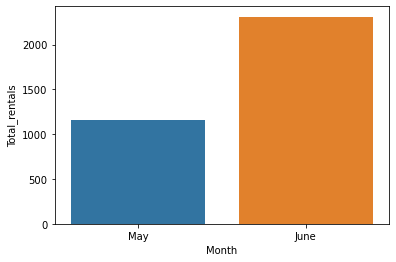

In [91]:
sns.barplot(y='Total_rentals' , x='Month', data=plot_df1)

In [ ]:
# Therefore in June there were more rentals (Total amounts)